# Uczenie maszynowe


## Przetwarzanie danych


Wczytywanie danych

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("heart.csv")

Wstępna analiza danych

In [3]:
df.head(n=10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Histogramy zmiennych

In [6]:
import matplotlib.pyplot as plt

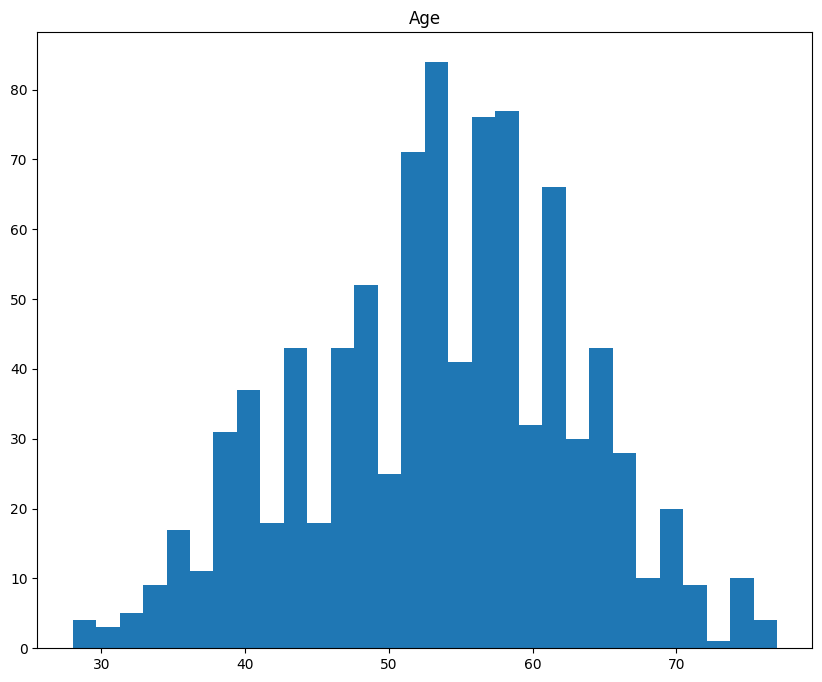

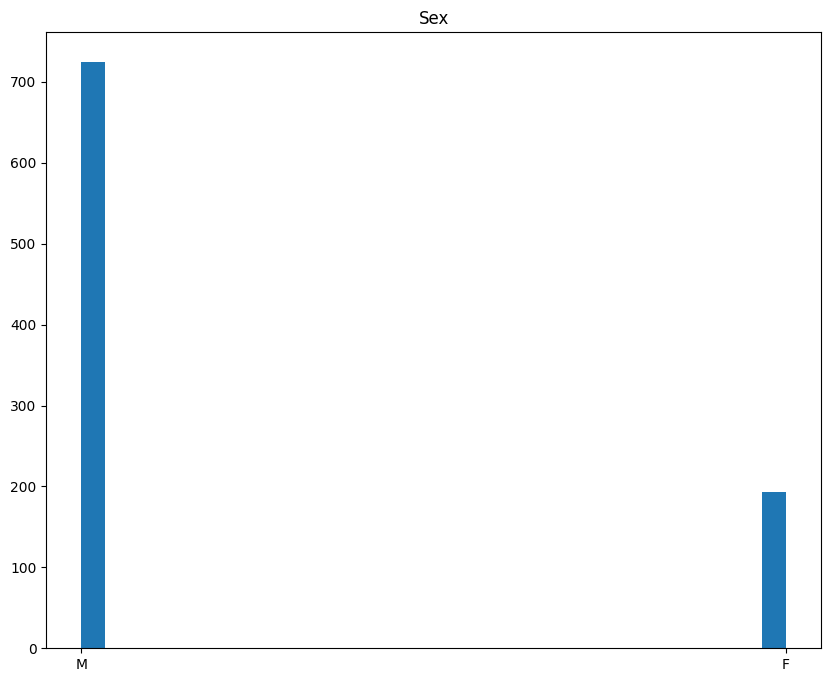

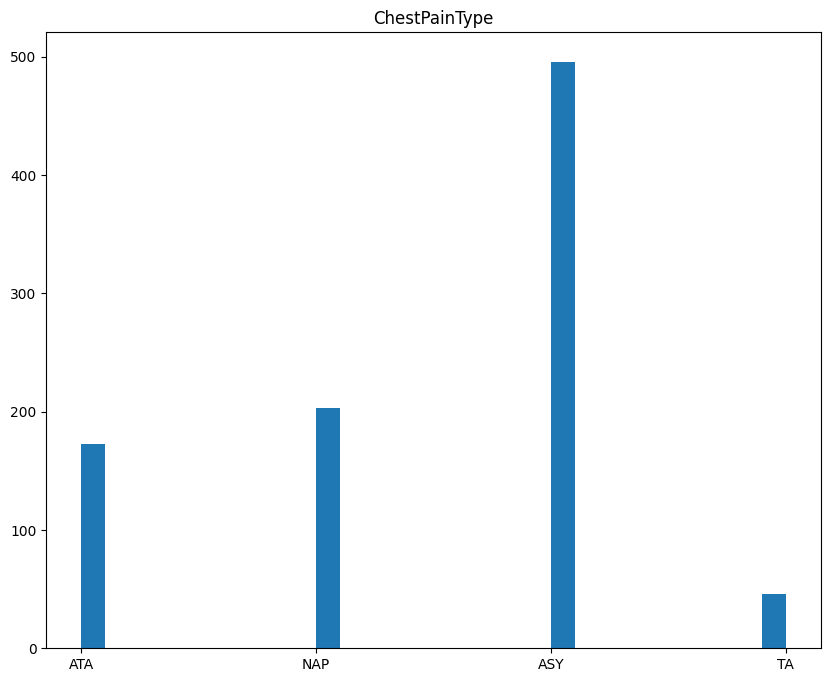

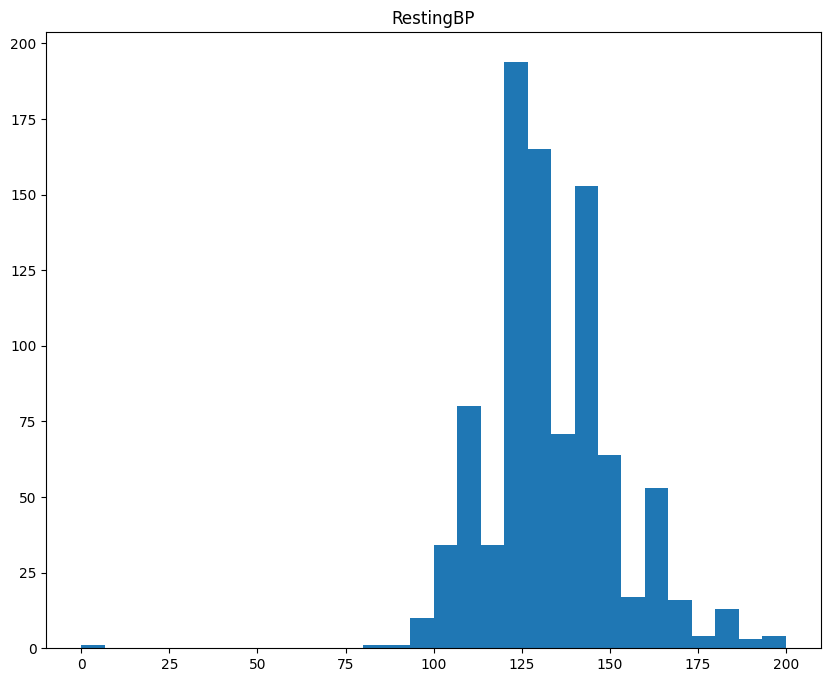

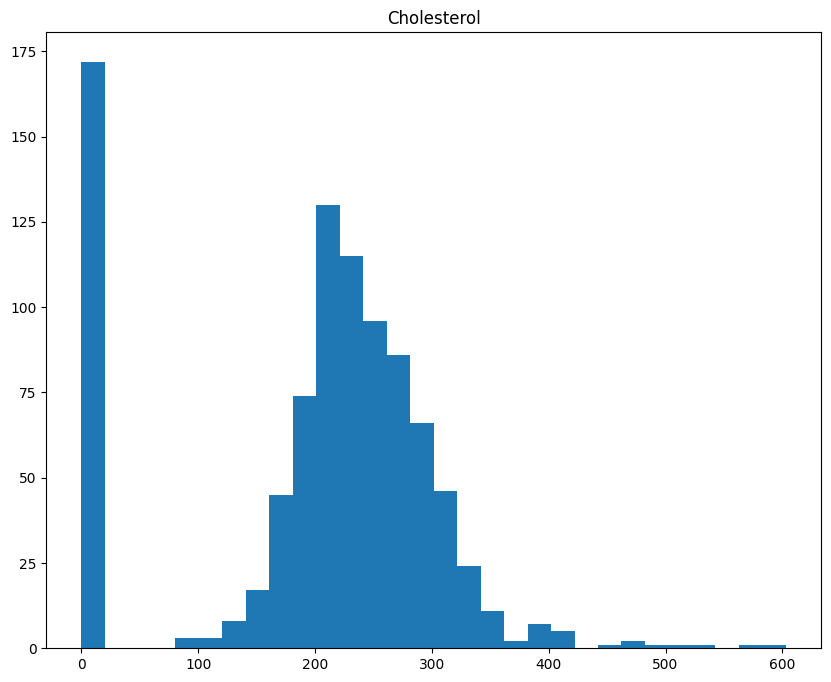

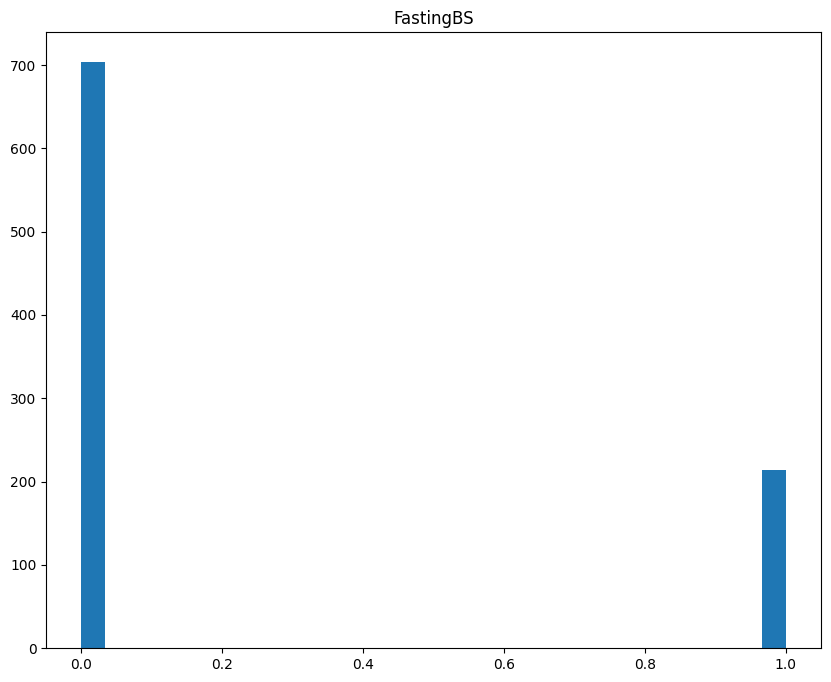

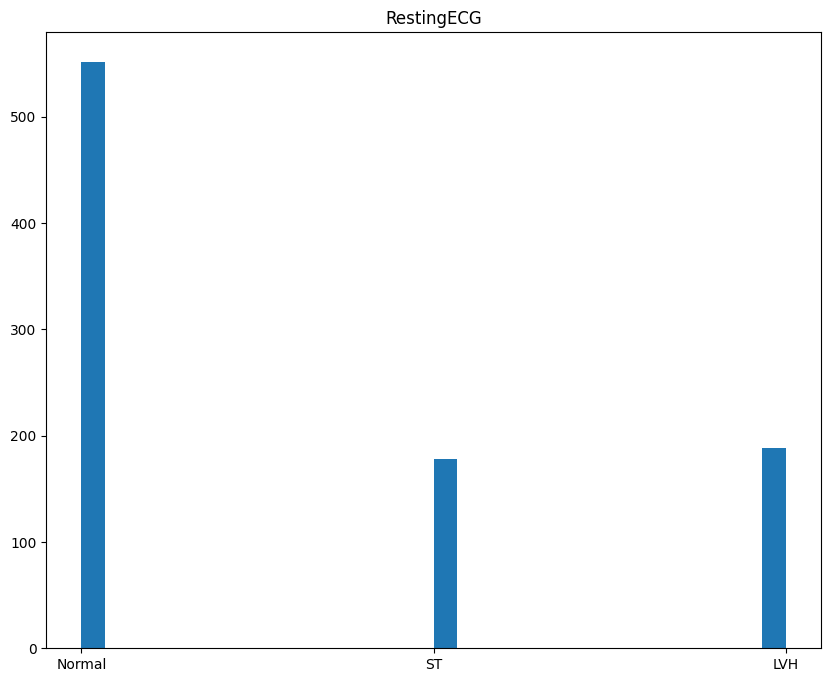

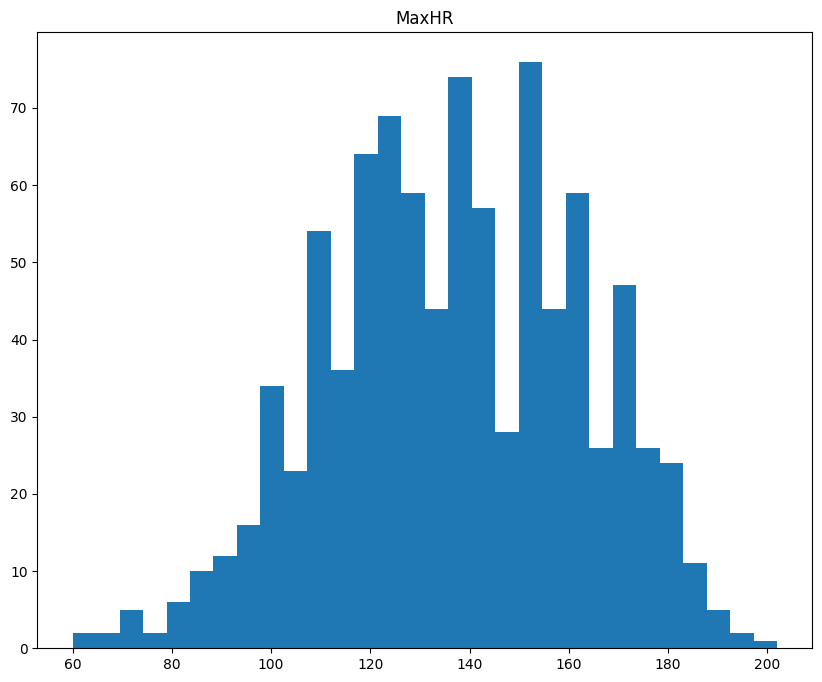

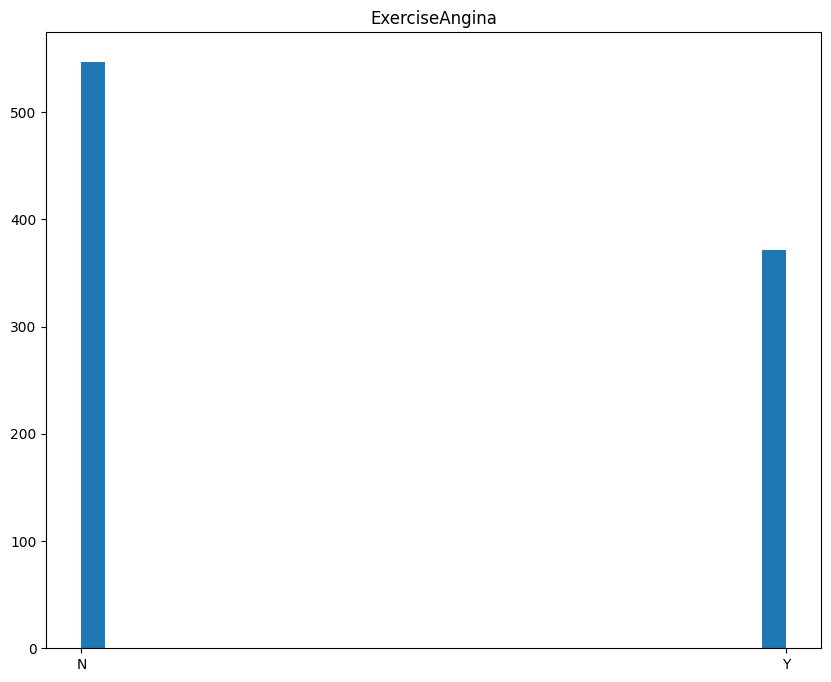

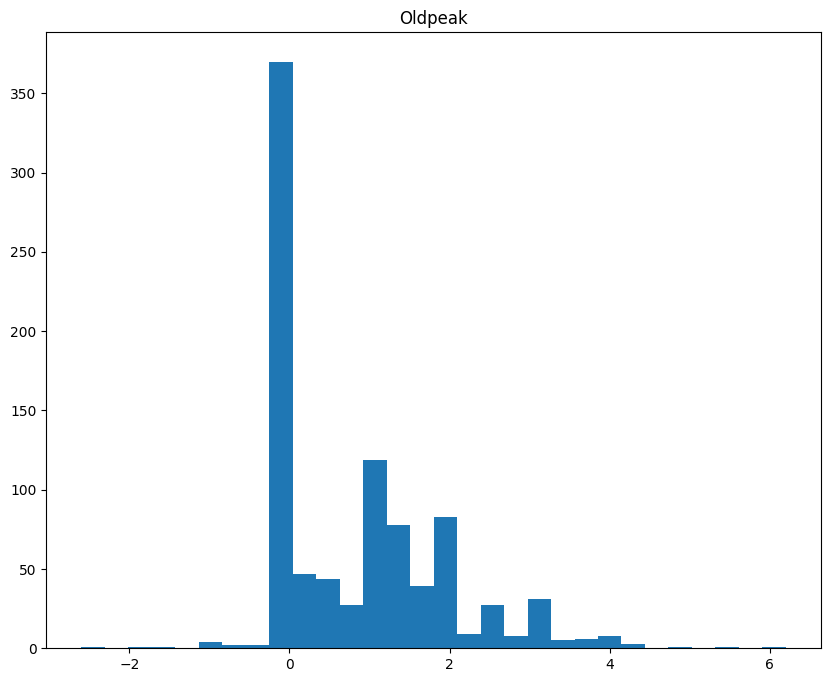

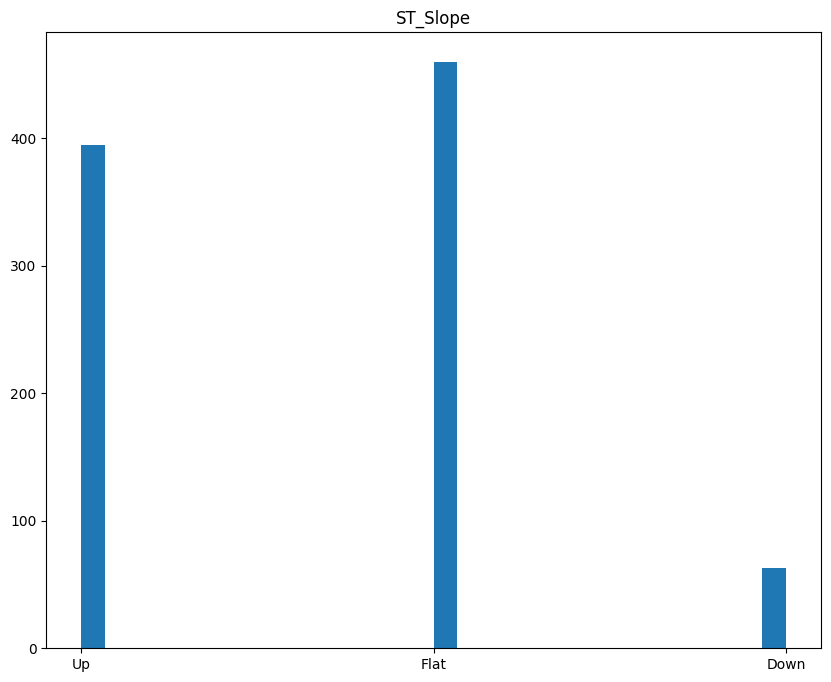

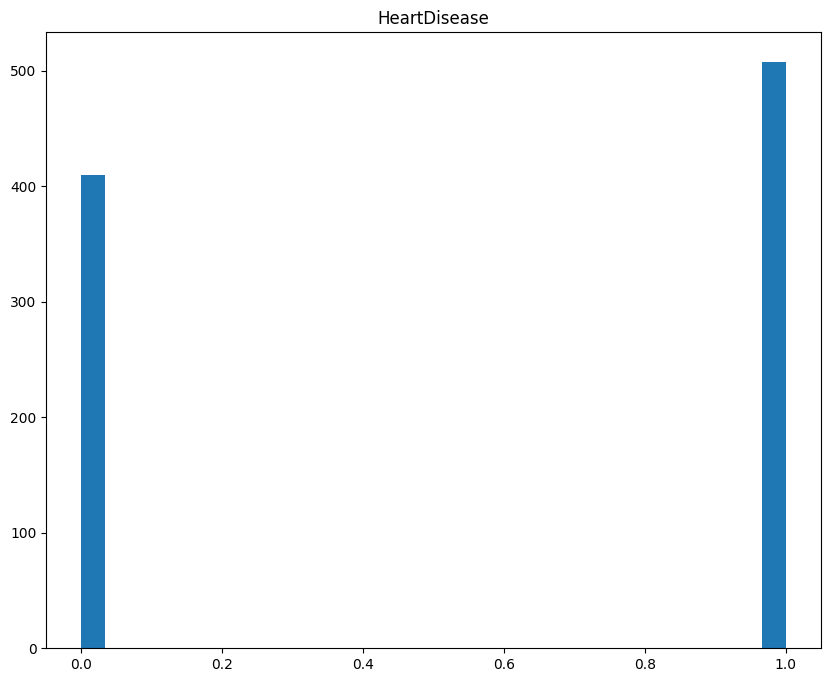

In [15]:
for col in df.columns:
    fig, ax = plt.subplots(figsize=(10,8))
    ax.hist(df[col],bins=30)
    ax.set_title(col)


Histogramy względem klas wyjściowych

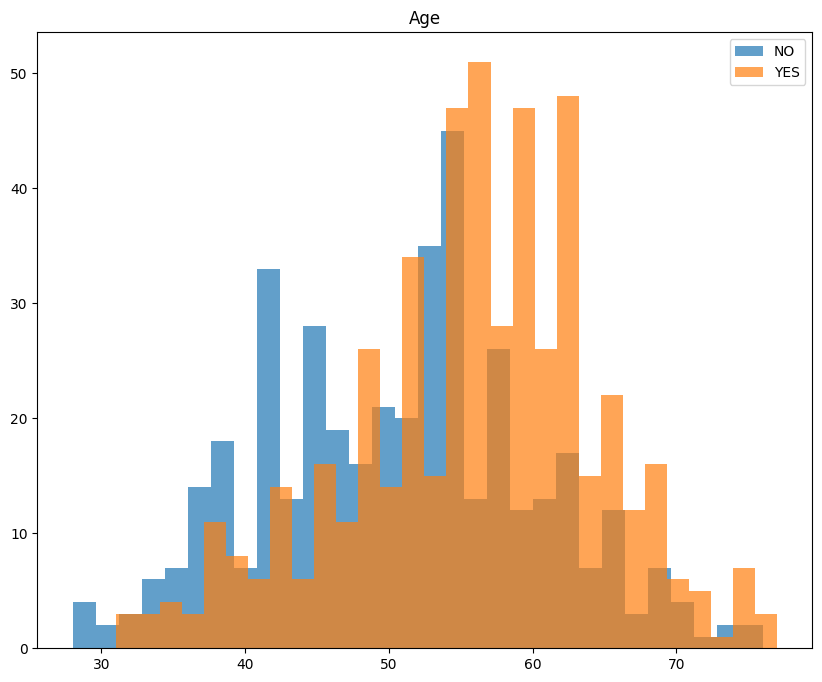

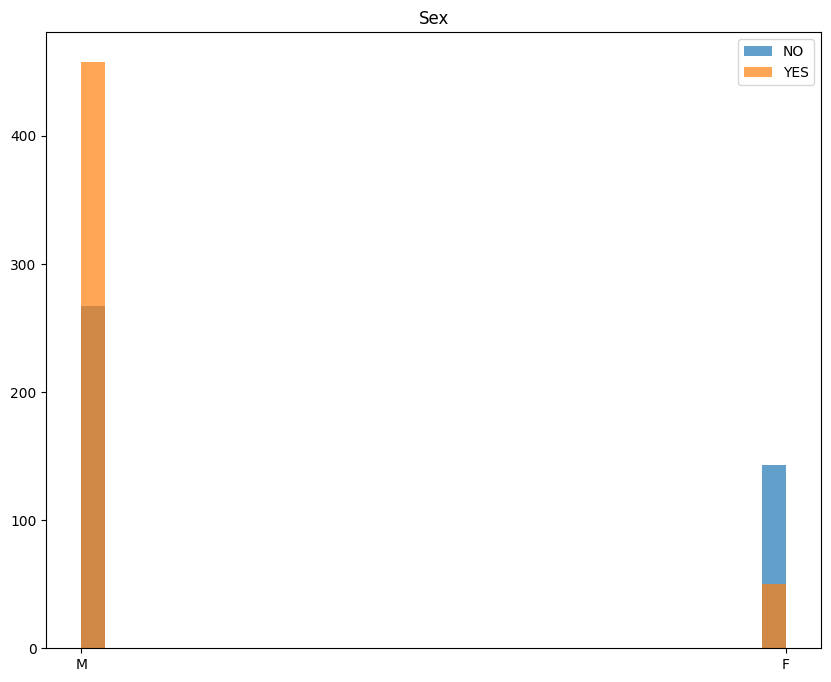

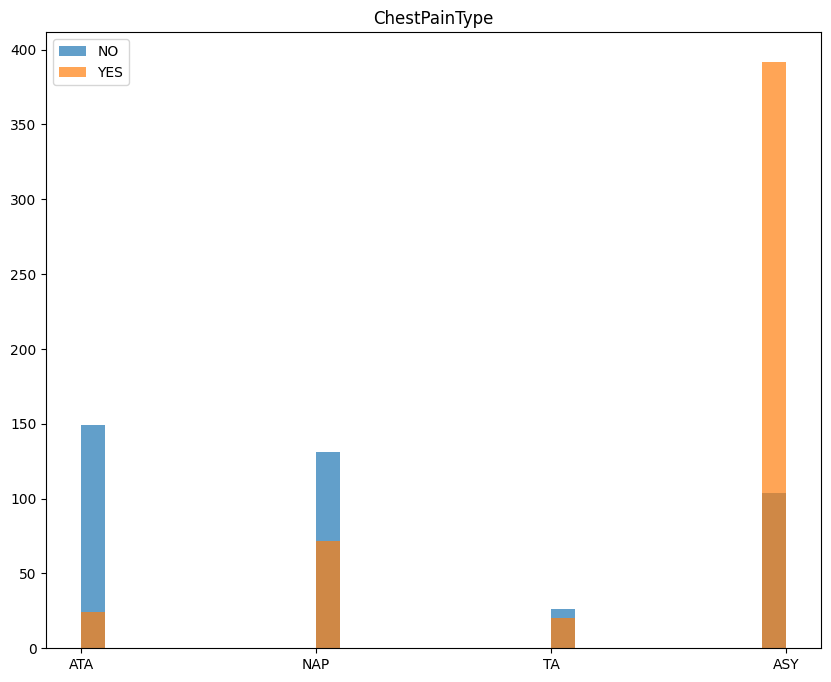

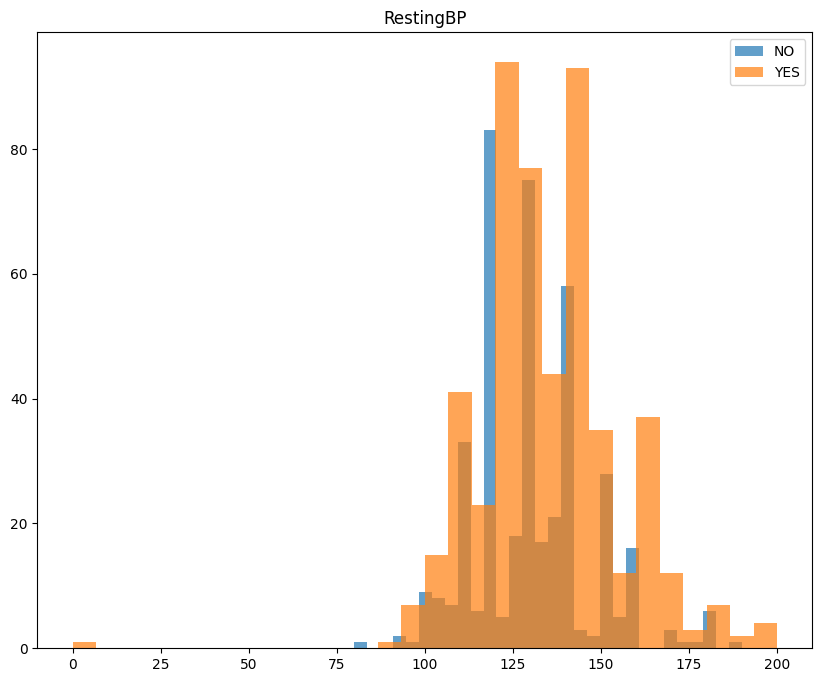

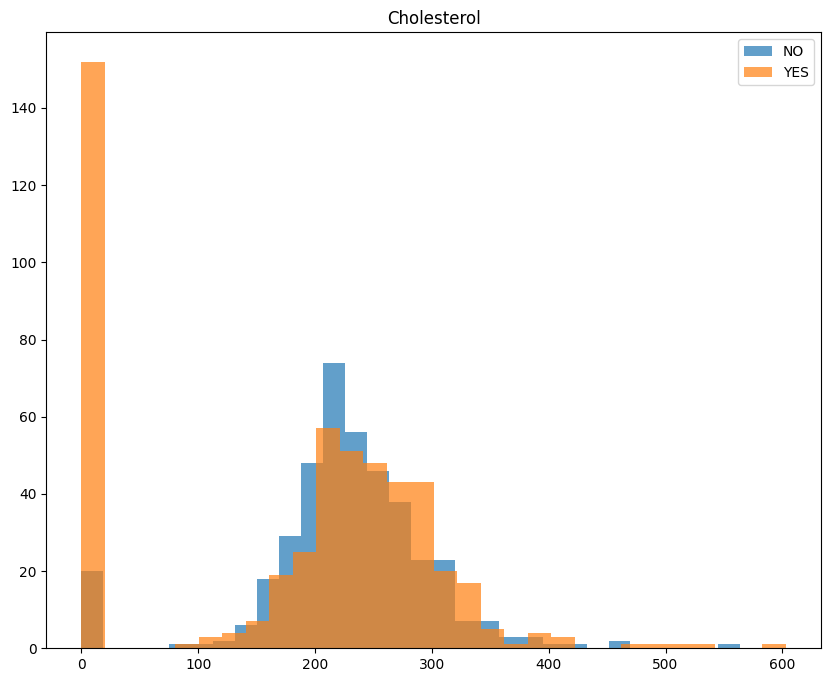

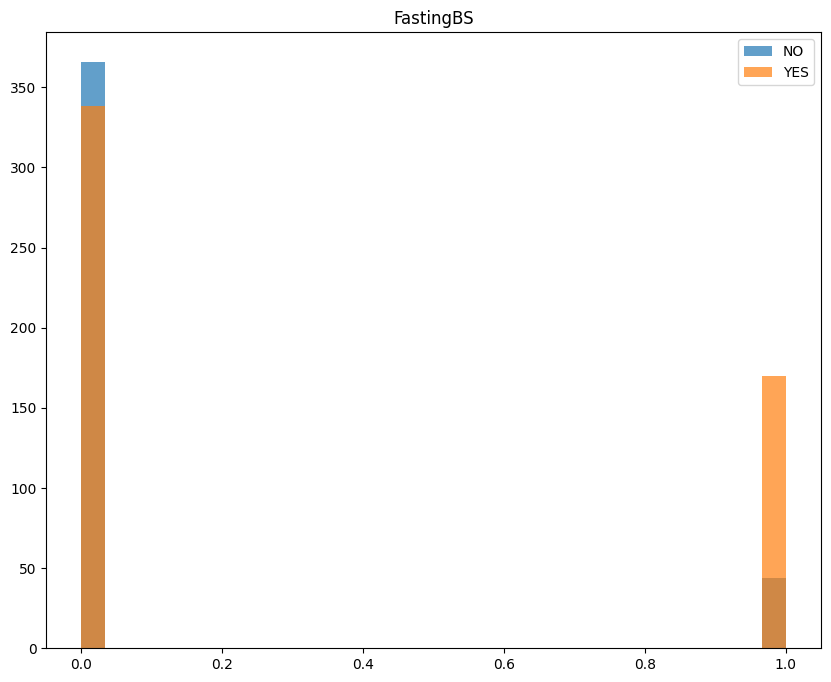

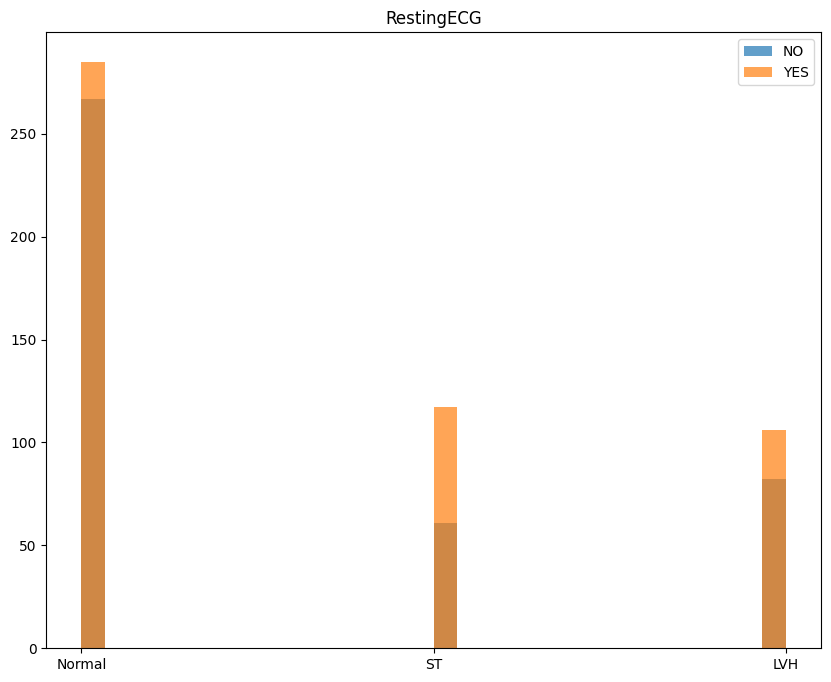

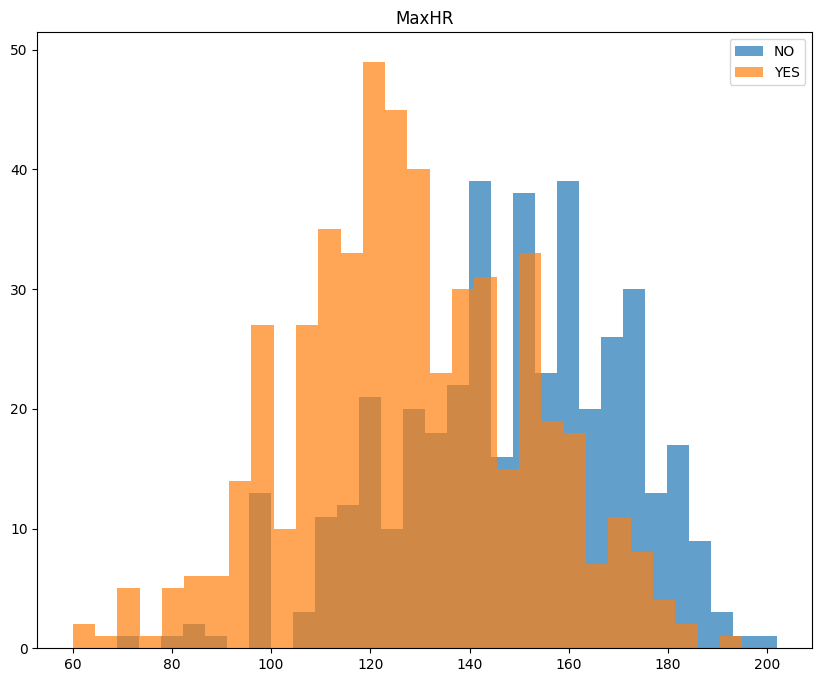

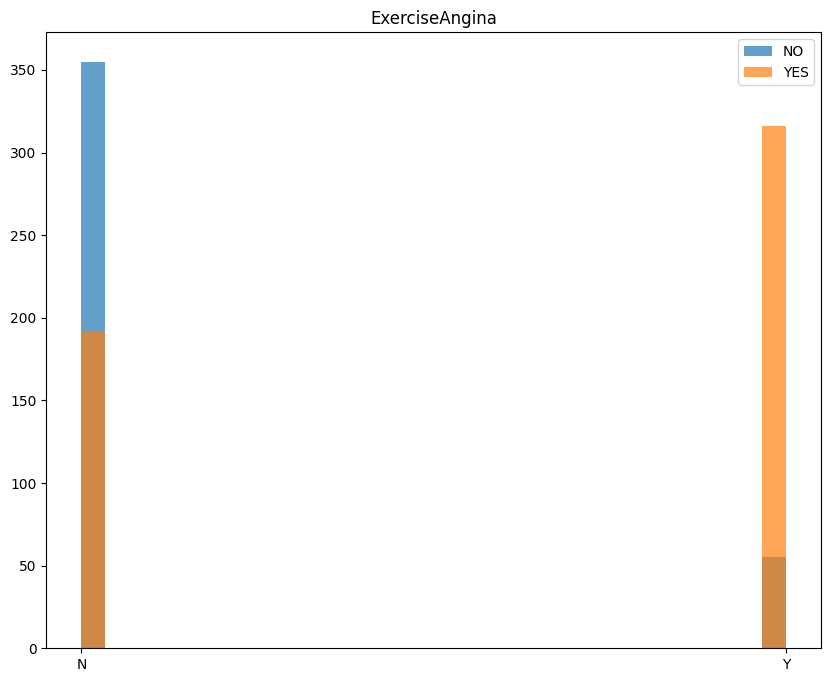

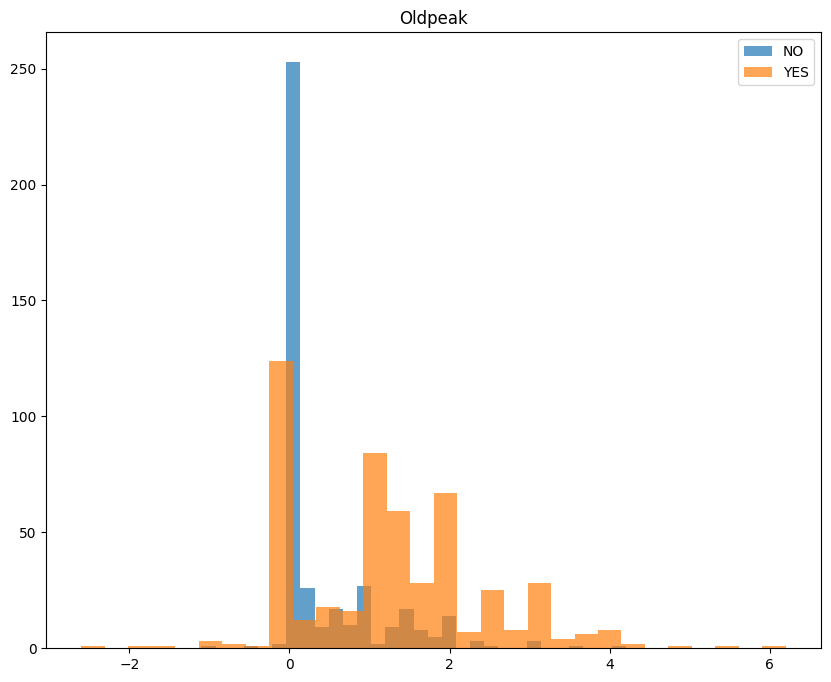

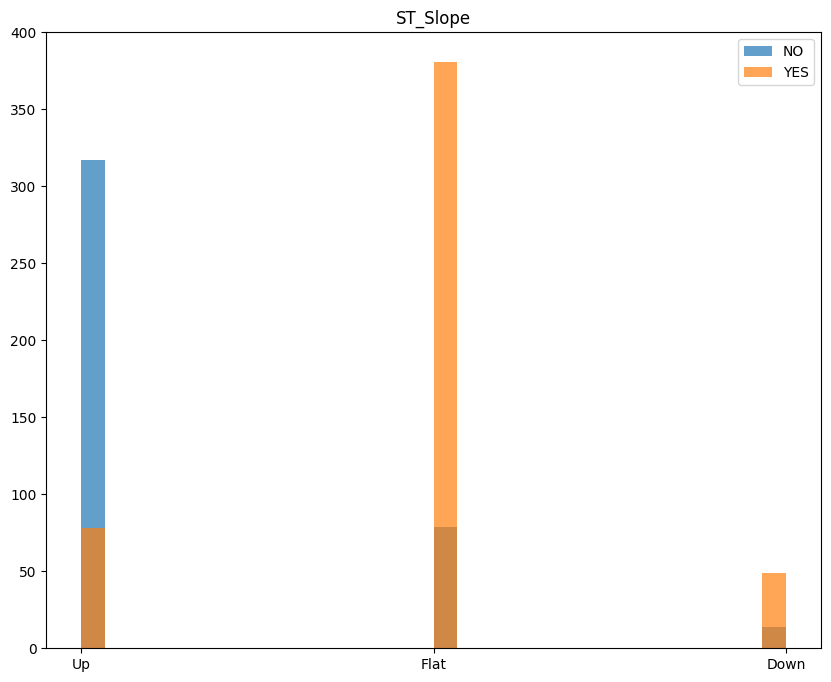

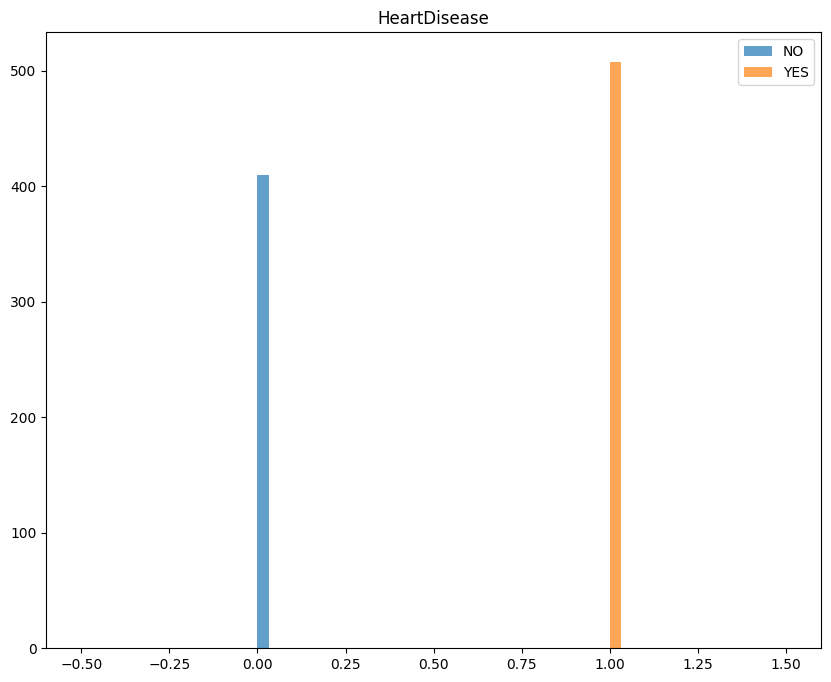

In [19]:
for col in df.columns:
    fig, ax = plt.subplots(figsize=(10,8))
    cl0 = df.loc[df["HeartDisease"]==0,col]
    cl1 = df.loc[df["HeartDisease"]==1,col]
    ax.hist(cl0,bins=30, alpha=0.7, label="NO")
    ax.hist(cl1,bins=30, alpha=0.7, label="YES")
    ax.legend()
    ax.set_title(col)

Przetwarzanie cech - dane dyskretne

In [21]:
df["Sex"].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df["Sex"].replace({"M":0, "F":1}, inplace=True)

In [24]:
df.head(n=10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,0,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,1,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,0,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,0,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,1,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [26]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [27]:
df["ChestPainType"].replace({"ATA":0, "NAP":1, "TA": 2, "ASY":3}, inplace=True)
df["ExerciseAngina"].replace({"N":0, "Y":1}, inplace=True)
df["ST_Slope"].replace({"Up":0, "Flat":1, "Down": 2}, inplace=True)

C:\Users\damian\AppData\Local\Temp\ipykernel_9476\1735614127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ChestPainType"].replace({"ATA":0, "NAP":1, "TA": 2, "ASY":3}, inplace=True)
C:\Users\damian\AppData\Local\Temp\ipykernel_9476\1735614127.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [28]:
df.head(n=10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,Normal,172,0,0.0,0,0
1,49,1,1,160,180,0,Normal,156,0,1.0,1,1
2,37,0,0,130,283,0,ST,98,0,0.0,0,0
3,48,1,3,138,214,0,Normal,108,1,1.5,1,1
4,54,0,1,150,195,0,Normal,122,0,0.0,0,0
5,39,0,1,120,339,0,Normal,170,0,0.0,0,0
6,45,1,0,130,237,0,Normal,170,0,0.0,0,0
7,54,0,0,110,208,0,Normal,142,0,0.0,0,0
8,37,0,3,140,207,0,Normal,130,1,1.5,1,1
9,48,1,0,120,284,0,Normal,120,0,0.0,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 86.2+ KB


Konwersja na One hot encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
enc = OneHotEncoder(sparse_output=False)
feat = enc.fit_transform(df[ ["RestingECG"] ])

In [42]:
enc.categories_

[array(['LVH', 'Normal', 'ST'], dtype=object)]

In [46]:
feat

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [47]:
df.head(n=10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,Normal,172,0,0.0,0,0
1,49,1,1,160,180,0,Normal,156,0,1.0,1,1
2,37,0,0,130,283,0,ST,98,0,0.0,0,0
3,48,1,3,138,214,0,Normal,108,1,1.5,1,1
4,54,0,1,150,195,0,Normal,122,0,0.0,0,0
5,39,0,1,120,339,0,Normal,170,0,0.0,0,0
6,45,1,0,130,237,0,Normal,170,0,0.0,0,0
7,54,0,0,110,208,0,Normal,142,0,0.0,0,0
8,37,0,3,140,207,0,Normal,130,1,1.5,1,1
9,48,1,0,120,284,0,Normal,120,0,0.0,0,0


In [48]:
df["RestingECGLVH"] = feat[:,0]
df["RestingECGNorm"] = feat[:,1]
df["RestingECGST"] = feat[:,2]

In [49]:
df.head(n=10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingECGLVH,RestingECGNorm,RestingECGST
0,40,0,0,140,289,0,Normal,172,0,0.0,0,0,0.0,1.0,0.0
1,49,1,1,160,180,0,Normal,156,0,1.0,1,1,0.0,1.0,0.0
2,37,0,0,130,283,0,ST,98,0,0.0,0,0,0.0,0.0,1.0
3,48,1,3,138,214,0,Normal,108,1,1.5,1,1,0.0,1.0,0.0
4,54,0,1,150,195,0,Normal,122,0,0.0,0,0,0.0,1.0,0.0
5,39,0,1,120,339,0,Normal,170,0,0.0,0,0,0.0,1.0,0.0
6,45,1,0,130,237,0,Normal,170,0,0.0,0,0,0.0,1.0,0.0
7,54,0,0,110,208,0,Normal,142,0,0.0,0,0,0.0,1.0,0.0
8,37,0,3,140,207,0,Normal,130,1,1.5,1,1,0.0,1.0,0.0
9,48,1,0,120,284,0,Normal,120,0,0.0,0,0,0.0,1.0,0.0


In [53]:
df.drop(columns=["RestingECG"], inplace=True)

In [51]:
hd = df.pop("HeartDisease")
df.insert(len(df.columns),"HeartDisease",hd)

In [54]:
df.head(n=10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingECGLVH,RestingECGNorm,RestingECGST,HeartDisease
0,40,0,0,140,289,0,172,0,0.0,0,0.0,1.0,0.0,0
1,49,1,1,160,180,0,156,0,1.0,1,0.0,1.0,0.0,1
2,37,0,0,130,283,0,98,0,0.0,0,0.0,0.0,1.0,0
3,48,1,3,138,214,0,108,1,1.5,1,0.0,1.0,0.0,1
4,54,0,1,150,195,0,122,0,0.0,0,0.0,1.0,0.0,0
5,39,0,1,120,339,0,170,0,0.0,0,0.0,1.0,0.0,0
6,45,1,0,130,237,0,170,0,0.0,0,0.0,1.0,0.0,0
7,54,0,0,110,208,0,142,0,0.0,0,0.0,1.0,0.0,0
8,37,0,3,140,207,0,130,1,1.5,1,0.0,1.0,0.0,1
9,48,1,0,120,284,0,120,0,0.0,0,0.0,1.0,0.0,0


Przetwarzanie danych ciągłych

In [67]:
df[df["RestingBP"]==0].index.values


array([], dtype=int64)

In [62]:
df["RestingBP"].mean()

132.39651416122004

In [63]:
idx = df[df["RestingBP"]==0].index.values[0]
df.at[idx,"RestingBP"] = df[df["RestingBP"]!=0].mean()

C:\Users\damian\AppData\Local\Temp\ipykernel_9476\1744143436.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '132.39651416122004' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx,"RestingBP"] = df["RestingBP"].mean()


In [68]:
df[df["RestingBP"]==0].index.values

array([], dtype=int64)

In [70]:
idx = df[df["Cholesterol"]==0].index
idx

Index([293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
       ...
       481, 483, 484, 492, 508, 514, 515, 518, 535, 536],
      dtype='int64', length=172)

In [73]:
m = df.loc[:,"Cholesterol"].mean()
m

198.7995642701525

In [75]:
me = df.loc[df["Cholesterol"]!=0,"Cholesterol"].mean()
me

244.6353887399464

In [76]:
df.loc[df["Cholesterol"]==0,"Cholesterol"] = me

C:\Users\damian\AppData\Local\Temp\ipykernel_9476\3929117355.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '244.6353887399464' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Cholesterol"]==0,"Cholesterol"] = me


Text(0.5, 1.0, 'Cholesterol')

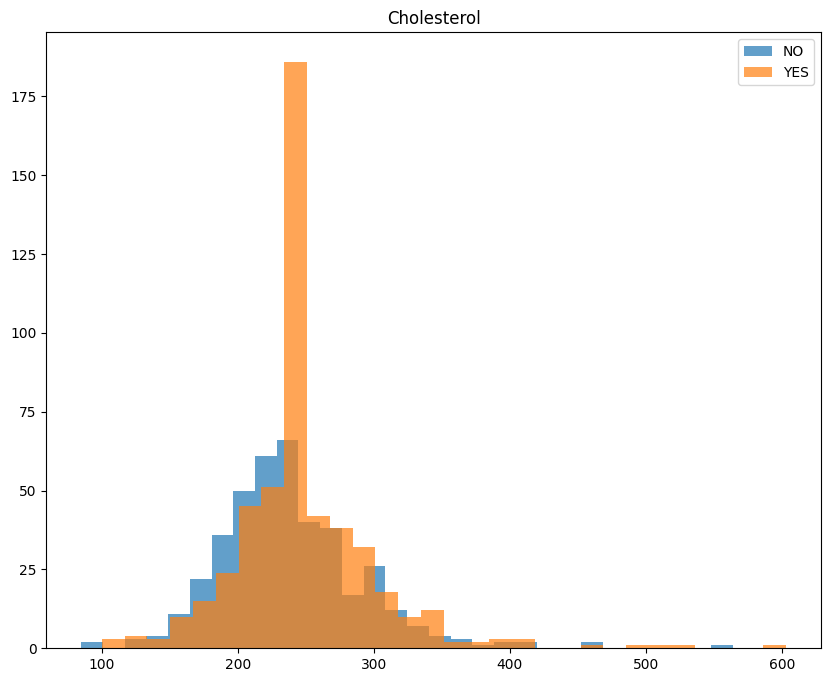

In [77]:
col = "Cholesterol"
fig, ax = plt.subplots(figsize=(10,8))
cl0 = df.loc[df["HeartDisease"]==0,col]
cl1 = df.loc[df["HeartDisease"]==1,col]
ax.hist(cl0,bins=30, alpha=0.7, label="NO")
ax.hist(cl1,bins=30, alpha=0.7, label="YES")
ax.legend()
ax.set_title(col)

Skalowanie

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

feat_to_scale = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
feat = scaler.fit_transform(df[feat_to_scale])

In [84]:
df.head(n=10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingECGLVH,RestingECGNorm,RestingECGST,HeartDisease
0,40,0,0,140.0,289.0,0,172,0,0.0,0,0.0,1.0,0.0,0
1,49,1,1,160.0,180.0,0,156,0,1.0,1,0.0,1.0,0.0,1
2,37,0,0,130.0,283.0,0,98,0,0.0,0,0.0,0.0,1.0,0
3,48,1,3,138.0,214.0,0,108,1,1.5,1,0.0,1.0,0.0,1
4,54,0,1,150.0,195.0,0,122,0,0.0,0,0.0,1.0,0.0,0
5,39,0,1,120.0,339.0,0,170,0,0.0,0,0.0,1.0,0.0,0
6,45,1,0,130.0,237.0,0,170,0,0.0,0,0.0,1.0,0.0,0
7,54,0,0,110.0,208.0,0,142,0,0.0,0,0.0,1.0,0.0,0
8,37,0,3,140.0,207.0,0,130,1,1.5,1,0.0,1.0,0.0,1
9,48,1,0,120.0,284.0,0,120,0,0.0,0,0.0,1.0,0.0,0


In [83]:
feat

array([[0.24489796, 0.5       , 0.39382239, 0.78873239, 0.29545455],
       [0.42857143, 0.66666667, 0.18339768, 0.67605634, 0.40909091],
       [0.18367347, 0.41666667, 0.38223938, 0.26760563, 0.29545455],
       ...,
       [0.59183673, 0.41666667, 0.08880309, 0.38732394, 0.43181818],
       [0.59183673, 0.41666667, 0.29150579, 0.8028169 , 0.29545455],
       [0.20408163, 0.48333333, 0.17374517, 0.79577465, 0.29545455]])

In [85]:
for i,col in enumerate(feat_to_scale):
    df[col] = feat[:,i]

In [86]:
df.head(n=10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingECGLVH,RestingECGNorm,RestingECGST,HeartDisease
0,0.244898,0,0,0.500000,0.393822,0,0.788732,0,0.295455,0,0.0,1.0,0.0,0
1,0.428571,1,1,0.666667,0.183398,0,0.676056,0,0.409091,1,0.0,1.0,0.0,1
2,0.183673,0,0,0.416667,0.382239,0,0.267606,0,0.295455,0,0.0,0.0,1.0,0
3,0.408163,1,3,0.483333,0.249035,0,0.338028,1,0.465909,1,0.0,1.0,0.0,1
4,0.530612,0,1,0.583333,0.212355,0,0.436620,0,0.295455,0,0.0,1.0,0.0,0
5,0.224490,0,1,0.333333,0.490347,0,0.774648,0,0.295455,0,0.0,1.0,0.0,0
6,0.346939,1,0,0.416667,0.293436,0,0.774648,0,0.295455,0,0.0,1.0,0.0,0
7,0.530612,0,0,0.250000,0.237452,0,0.577465,0,0.295455,0,0.0,1.0,0.0,0
8,0.183673,0,3,0.500000,0.235521,0,0.492958,1,0.465909,1,0.0,1.0,0.0,1
9,0.408163,1,0,0.333333,0.384170,0,0.422535,0,0.295455,0,0.0,1.0,0.0,0


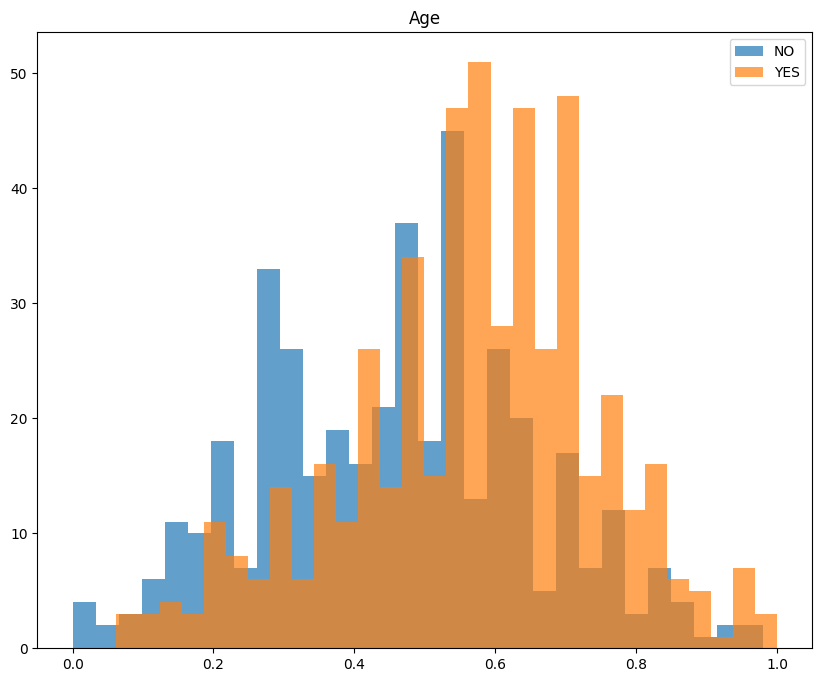

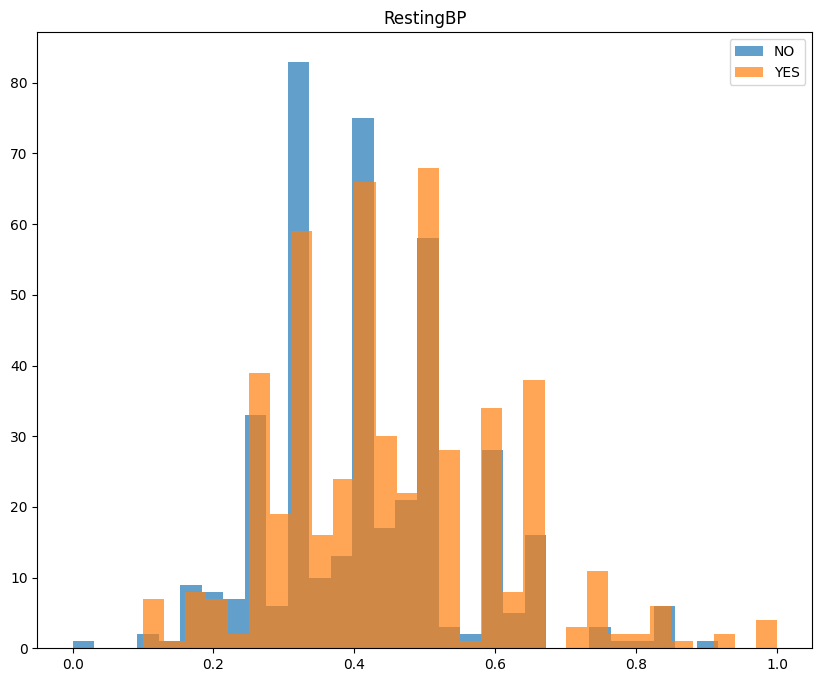

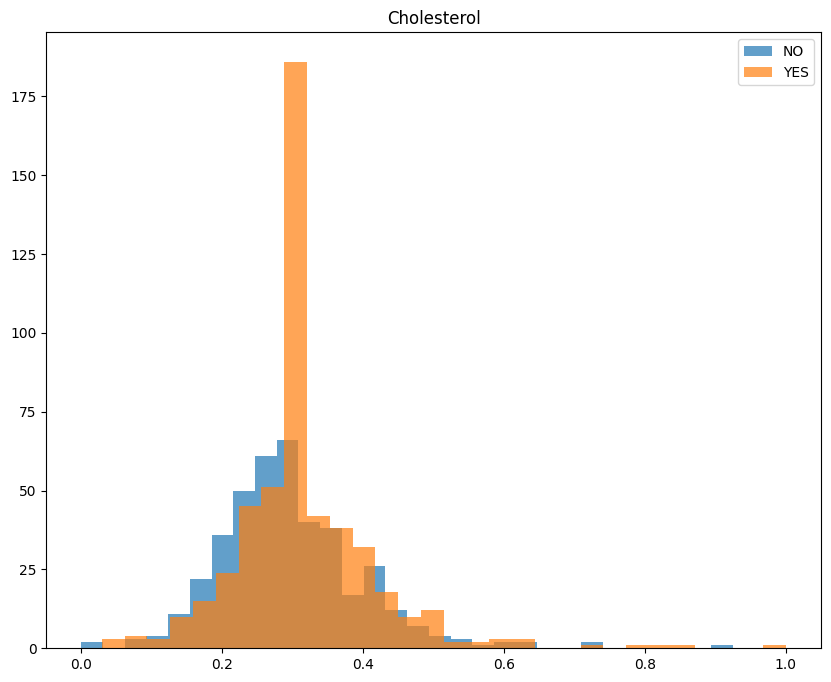

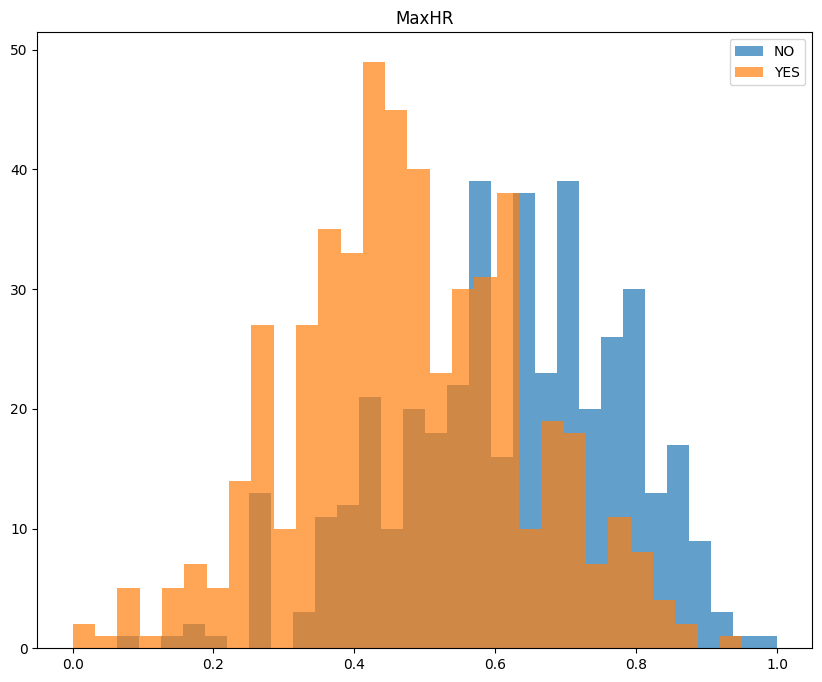

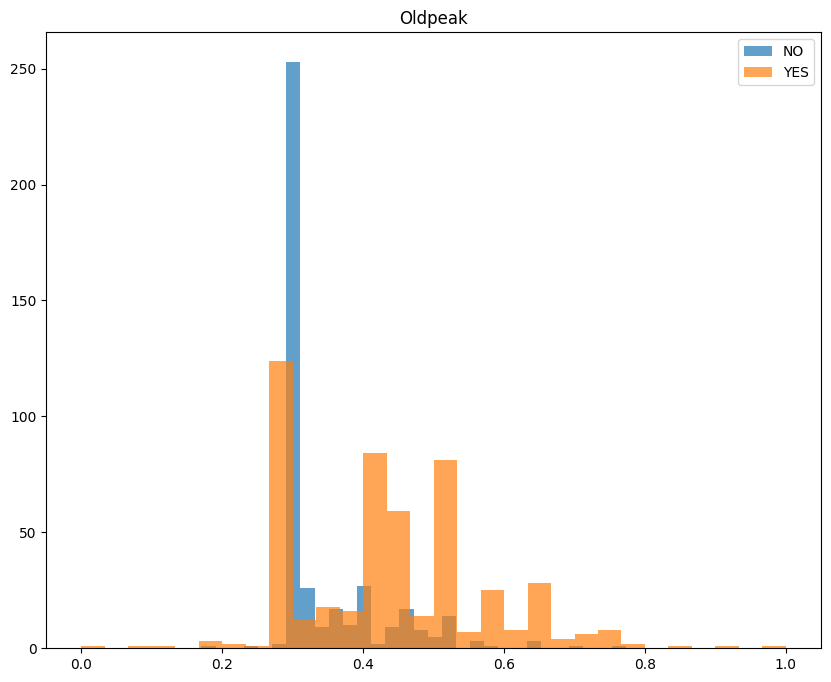

In [87]:
for col in feat_to_scale:
    fig, ax = plt.subplots(figsize=(10,8))
    cl0 = df.loc[df["HeartDisease"]==0,col]
    cl1 = df.loc[df["HeartDisease"]==1,col]
    ax.hist(cl0,bins=30, alpha=0.7, label="NO")
    ax.hist(cl1,bins=30, alpha=0.7, label="YES")
    ax.legend()
    ax.set_title(col)

In [88]:
df.head(n=10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingECGLVH,RestingECGNorm,RestingECGST,HeartDisease
0,0.244898,0,0,0.500000,0.393822,0,0.788732,0,0.295455,0,0.0,1.0,0.0,0
1,0.428571,1,1,0.666667,0.183398,0,0.676056,0,0.409091,1,0.0,1.0,0.0,1
2,0.183673,0,0,0.416667,0.382239,0,0.267606,0,0.295455,0,0.0,0.0,1.0,0
3,0.408163,1,3,0.483333,0.249035,0,0.338028,1,0.465909,1,0.0,1.0,0.0,1
4,0.530612,0,1,0.583333,0.212355,0,0.436620,0,0.295455,0,0.0,1.0,0.0,0
5,0.224490,0,1,0.333333,0.490347,0,0.774648,0,0.295455,0,0.0,1.0,0.0,0
6,0.346939,1,0,0.416667,0.293436,0,0.774648,0,0.295455,0,0.0,1.0,0.0,0
7,0.530612,0,0,0.250000,0.237452,0,0.577465,0,0.295455,0,0.0,1.0,0.0,0
8,0.183673,0,3,0.500000,0.235521,0,0.492958,1,0.465909,1,0.0,1.0,0.0,1
9,0.408163,1,0,0.333333,0.384170,0,0.422535,0,0.295455,0,0.0,1.0,0.0,0


## Trenowanie modeli

Podział na zbiór uczący i testowy

In [96]:
from sklearn.model_selection import train_test_split


In [89]:
df.shape

(918, 14)

In [93]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [94]:
X.shape

(918, 13)

In [95]:
y.shape

(918,)

In [97]:
X_train, X_test, y_train,y_test, = train_test_split(X, y, test_size=0.3, random_state=0)

Wybór modelu

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
model = KNeighborsClassifier(n_neighbors = 10)

Trenowanie modelu

In [100]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Testowanie modelu na zbiorze testowym

In [101]:
y_pred = model.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

TN, FP
FN, TP


In [104]:
print("TN, FP")
print("FN, TP")
print(confusion_matrix(y_test, y_pred))
print("Accuracy=(TN+TP)/N")
print(accuracy_score(y_test, y_pred))
print("Precison=TP/(TP+FP)")
print(precision_score(y_test, y_pred))
print("Recall=TP/(TP+FP)")
print(recall_score(y_test, y_pred))
print("F1=2/(1/P+1/R)")
print(f1_score(y_test, y_pred))

[[ 88  25]
 [ 22 141]]
0.8297101449275363
0.8493975903614458
0.8650306748466258
0.8571428571428571


Inny model

In [105]:
from sklearn.svm import SVC

In [106]:
model = SVC(kernel='rbf')

In [107]:
model.fit(X_train, y_train)

SVC()

In [108]:
y_pred = model.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [110]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[ 84  29]
 [ 20 143]]
0.822463768115942
0.8313953488372093
0.8773006134969326
0.8537313432835821
